In [ ]:
#EDA on Kaggle's 80 Cereals dataset
#tby 211209

### Context
You are hired as a data scientist for a Cereals Inc. You are tasked with understanding customer ratings of different cereals.

### Objective
- Which manufacturer produces the most cereal?
- Which cereal gets the highest ratings?
- What factors (i.e., nutrition, shelf, weight, etc.) possibly influence this rating?

### Data Dictionary
Name: Name of cereal

mfr: Manufacturer of cereal

A = American Home Food Products;
G = General Mills
K = Kelloggs
N = Nabisco
P = Post
Q = Quaker Oats
R = Ralston Purina

type:
cold
hot

calories: calories per serving

protein: grams of protein

fat: grams of fat

sodium: milligrams of sodium

fiber: grams of dietary fiber

carbo: grams of complex carbohydrates

sugars: grams of sugars

potass: milligrams of potassium

vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended

shelf: display shelf (1, 2, or 3, counting from the floor)

weight: weight in ounces of one serving

cups: number of cups in one serving

rating: a rating of the cereals (Possibly from Consumer Reports?)

In [1]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

### Getting a Sense of the Data

In [2]:
#load in the data
df_cereal=pd.read_csv('cereal.csv')
#see the first 5 rows
df_cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


### Insights
- There appear to be a mix of numerical and categorical data types, all of which have been explained in the data dictionary above

In [9]:
#summary of the data
df_cereal.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [4]:
#check the shape of the data
df_cereal.shape
#77 rows and 16 columns

(77, 16)

In [19]:
#check if there are repeating names
print('the number of unique cereal names is',len(df_cereal['name'].unique()))

the number of unique cereal names is 77


In [17]:
#are there any null values
df_cereal.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

### Insights
- There are 77 rows, each row contains a unique cereal name and information
- There are 16 columns, attributes which are listed in the data dictionary
- There are no null values in this data set

In [12]:
#change objects to categories
#we will see later if this was the right thing to do or not
df_cereal.name = df_cereal.name .astype('category')
df_cereal.mfr = df_cereal.mfr.astype('category')
df_cereal.type= df_cereal.type.astype('category')

#check the dataframe to make sure these changes were made
#df_cereal.info(verbose = True)

In [11]:
#looking at the summary statistics of the dataframe with describe
df_cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


### Insights
- Calories range from ~50 to ~160 with a mean of ~106, meaning despite the range, likely more cereals have more calories (i.e., closer to 160 than 50).
- Protein has a very small range, showing that cereal often has a low and similar range of protein content.
- Fat also has a small range, demonstrating that cereal often has a low and similar range of fat content.
- Sodium has a very wide range from 0 to 320 with a mean of ~160.
- Fiber ranges from 0 to 14, with a mean of ~2, meaning most cereals have a low fiber content.
- Carbo is a bit confusing given there is a negative as the minimum and ranges to 23 carbs with a mean of ~15, meaning most cereals have a higher carb count.
- Sugars range from no sugar to 15 sugar with a mean of ~7, so most cereals have a higher sugar content.
- Potass raneg from -1 to 330, showing probably the widest range in the dataset.
- Vitamins range from no vitamins present to 100 with a mean of ~28, likely meaning that more cereals have less vitamins on average.
- Shelf has only three values 1,2,and 3. Mean is ~2.2 which means more items are on higher shelves, than lower shelves.
- Weight in ounces of a serving range from ~0.5 to 1.5, which is likely due to the varying amount of cups in one serving (seen below).
- Cups range from ~0.25 to 1.5, meaning there is quite a range in number of cups in one serving.
- Rating ranges from ~18 to ~94 with a mean around ~43. Likely meaning more cereals are rated lower than higher.

### Analysis

### Objective 1: Which manufacturer produces the most cereal?

In [21]:
#to explore categorical variables
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<Figure size 720x504 with 0 Axes>

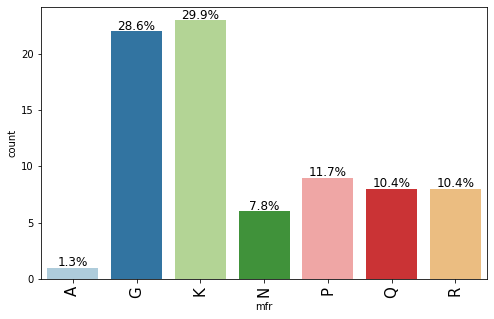

In [22]:
plt.figure(figsize=(10,7))
labeled_barplot(df_cereal, 'mfr', perc=True)

### Insights
- There are 7 different manufacturers in this dataset
- The cereal market appers to be dominated by two manufacturers (General Mills and Kellog)
- These two manufactueres alone make up over half of the cereals on the market
- Kellogs makes the most cereals (at ~30 percent) and General Mills makes the second most (at ~29%)
- American Home Food Products makes the least amount of cereal at ~1%

### Objective 2: Which cereal has the highest ratings?

In [26]:
#to do univariate analysis I am going to make a histogram and box plot
#this will aid in looking at the central tendency of the data and dispersion of each variable
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="lightsteelblue"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="lightsteelblue"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, color="lightsteelblue"
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [23]:
#first, let's get a sense of what the ratings data looks like
df_cereal['rating'].value_counts()

39.259197    1
46.895644    1
49.787445    1
51.592193    1
37.136863    1
            ..
37.840594    1
34.384843    1
49.120253    1
31.230054    1
58.345141    1
Name: rating, Length: 77, dtype: int64

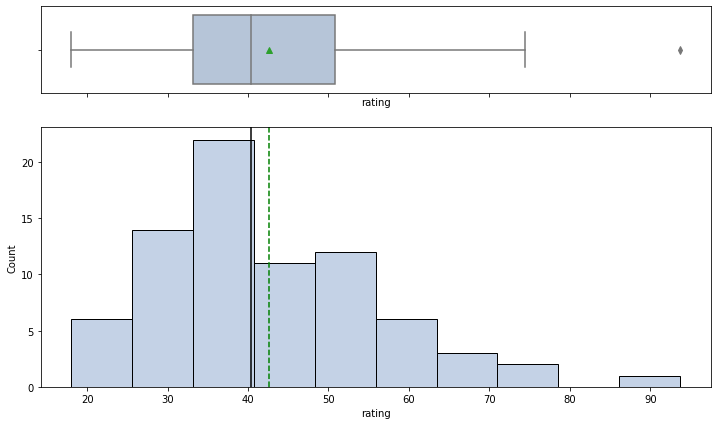

In [25]:
histogram_boxplot(df_cereal, 'rating')

### Insights
- There is one outlier in this data set, a cereal which was really highly rated, as compared to the other cereals
- The dat is slightly left skewed with the mean being a little more than the median
- Overall, it looks like people tend to rate their cereals under the number 40

In [27]:
#which cereal is rated the highest and what info do we have about it
df_cereal.iloc[df_cereal['rating'].idxmax(),:]

name        All-Bran with Extra Fiber
mfr                                 K
type                                C
calories                           50
protein                             4
fat                                 0
sodium                            140
fiber                            14.0
carbo                             8.0
sugars                              0
potass                            330
vitamins                           25
shelf                               3
weight                            1.0
cups                              0.5
rating                      93.704912
Name: 3, dtype: object

### Insight
- All-Bran with Extra Fiber is the most highly rated cereal (and the outlier we saw in the graph above)

### Exploratory Data Analysis of Rating

In [ ]:
df_type_A = df_cereal[df_cereal['mfr'] == 'A'].value_counts().sum()
df_type_G = df_cereal[df_cereal['mfr'] == 'G'].value_counts().sum()
df_type_K = df_cereal[df_cereal['mfr'] == 'K'].value_counts().sum()
df_type_N = df_cereal[df_cereal['mfr'] == 'N'].value_counts().sum()
df_type_P = df_cereal[df_cereal['mfr'] == 'P'].value_counts().sum()
df_type_Q = df_cereal[df_cereal['mfr'] == 'Q'].value_counts().sum()
df_type_R = df_cereal[df_cereal['mfr'] == 'R'].value_counts().sum()
#print the results
print('The number of cereals from A is', df_type_A)
print('The number of cereals from G is', df_type_G)
print('The number of cereals from K is', df_type_K)
print('The number of cereals from N is', df_type_N)
print('The number of cereals from P is', df_type_P)
print('The number of cereals from Q is', df_type_Q)
print('The number of cereals from R is', df_type_R)

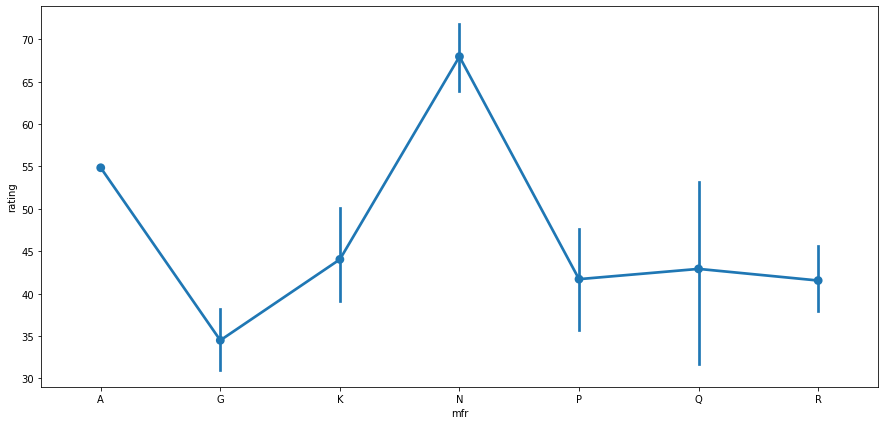

In [30]:
#is a higher rating related to the manufacturer of cereal
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'mfr', y = 'rating', data = df_cereal)
plt.show()

### Insights
- Nabisco has the highest rating, followed by American Home Food, with General Mills having the lowest rating
- However, the number of cereals each produces are imbalanced and these results should be interpreted with caution

In [41]:
#how many cold and how many hot cereals are there
df_type_cold = df_cereal[df_cereal['type'] == 'C'].value_counts().sum()
df_type_hot = df_cereal[df_cereal['type'] == 'H'].value_counts().sum()
print('The number of hot cereals is ', df_type_hot)
print('The number of cold cereals is ', df_type_cold)

The number of hot cereals is  3
The number of cold cereals is  74


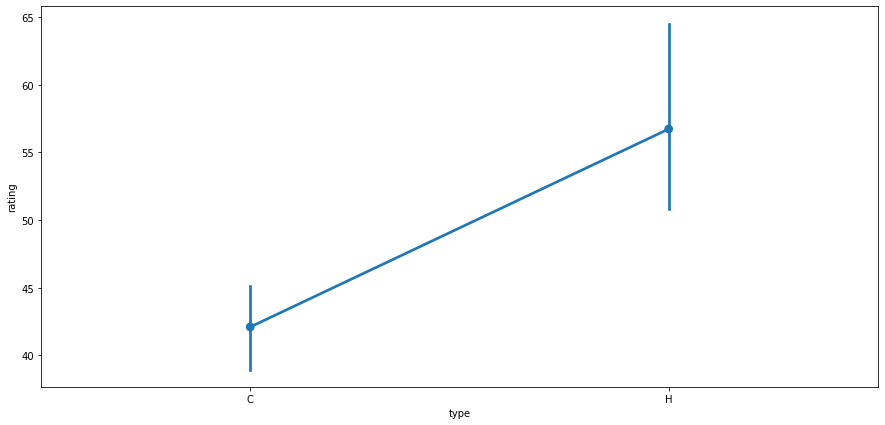

In [31]:
#is a higher rating related to the type of cereal
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'type', y = 'rating', data = df_cereal)
plt.show()

### Insights
- Hot cereals are rated higher than cold cereals, but this should be taken lighlty because there are only 3 hot cereals

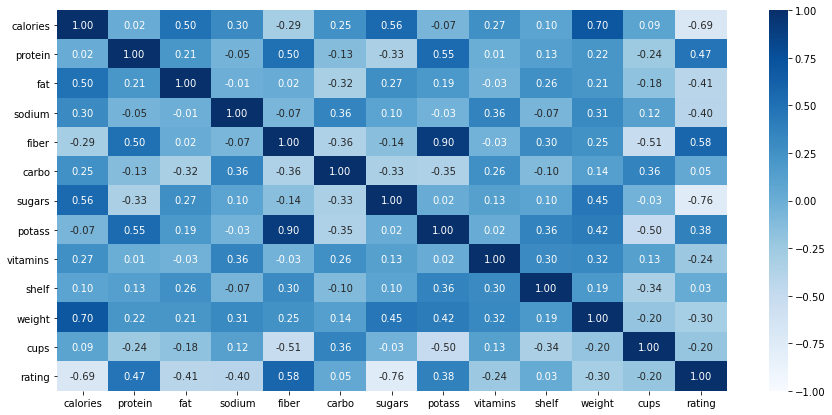

In [28]:
#run a correlation matrix
#correlation matrix between all numeric variables
num_var = ['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cups','rating']

#call the correlation function and assign to variable corr so not writing over anything and easier to pass through
#the heatmap function
corr = df_cereal[num_var].corr()

# plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Blues", xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

### Insights
- We are really interested in what corrrelats with ratings to get a better sense of what may influence ratings
- Factors that are moderately, positively related to ratings are amount of protein and fiber
- Factors that are moderately, negatively related to ratings are calories and sugars

### Conclusion
- I analyzed 80 cereals from 7 different manufacturers
- General Mills and Kellogs are the biggest cereal producers on the market (from this dataset)
- All-Bran with Extra Fiber is the most highly rated cereal at ~93%
- Nutritional content may have an influence on cereal's ratings

### Business Recommendations
- To increase ratings, produce cereals that are lower in calories and sugars, and higher in protein and fiber